In [7]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 5##

## Functions ##

In [1]:
def triple(x):
    """multiply 3 to x"""
    return 3 * x

In [2]:
triple(3)

9

In [3]:
num = 4

In [4]:
triple(num)

12

In [5]:
triple(num * 5)

60

### Multiple Arguments

$ h^2 = x^2 + y^2 \hspace{20 pt} => \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $

In [12]:
def hypotenuse(x,y):
    hypot_squared = (x ** 2 + y ** 2)
    return hypot_squared ** 0.5

In [13]:
hypotenuse(9, 12)

15.0

In [14]:
hypotenuse(2, 2)

2.8284271247461903

## Apply

In [15]:
ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [16]:
def cap_at_1980(x):
    return min(x, 1980)

In [17]:
cap_at_1980(1975)

1975

In [18]:
cap_at_1980(1991)

1980

In [19]:
ages.apply(cap_at_1980, 'Birth Year')

array([1980, 1980, 1967, 1904], dtype=int64)

In [20]:
def name_and_age(name, year):
    age = 2022 - year
    return name + ' is ' + str(age)

In [21]:
ages.apply(name_and_age, 'Person', 'Birth Year')

array(['Jim is 34', 'Pam is 31', 'Michael is 52', 'Creed is 115'],
      dtype='<U13')

## Grouping by One Column ##

In [8]:
cones = Table.read_table('cones.csv')

In [9]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [10]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [13]:
cones.drop('Color').group('Flavor', np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [12]:
cones.drop('Color').group('Flavor', min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


## Grouping By One Column: Welcome Survey ##

In [14]:
survey = Table.read_table('welcome_survey_v1.csv')
survey

Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position
8,10,6,Left-handed,I don't know,On your back
7,4,7,Left-handed,I don't know,On your back
3,6,7,Left-handed,I don't know,On your back
3,8,7,Left-handed,I don't know,On your back
3,3,9,Left-handed,I don't know,On your back
3,1,5,Right-handed,I don't know,On your back
4,6,5,Right-handed,I don't know,On your back
4,1,6,Right-handed,I don't know,On your back
3,3,6,Right-handed,I don't know,On your back
5,3,6,Right-handed,I don't know,On your back


In [28]:
by_extra = survey.group('Extraversion', np.average)
by_extra

Extraversion,Number of textees average,Hours of sleep average,Handedness average,Pant leg average,Sleep position average
1,2.57895,7.21053,,,
2,4.30612,7.10204,,,
3,5.43529,7.12941,,,
4,5.75,7.09398,,,
5,5.92216,7.1488,,,
6,6.52121,7.07576,,,
7,7.79039,7.1441,,,
8,8.6036,7.26577,,,
9,10.8889,7.48889,,,
10,18.6667,7.77778,,,


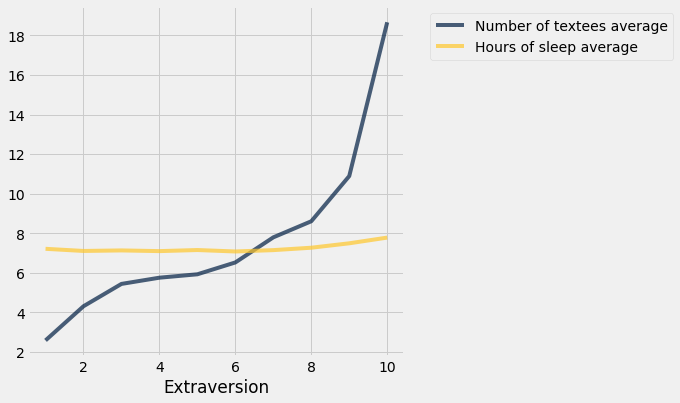

In [29]:
by_extra.select(0,1,2).plot('Extraversion') # Drop the categorical columns

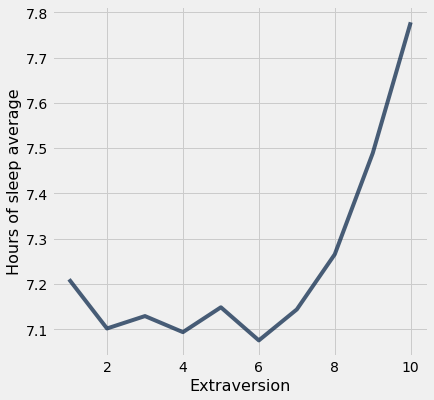

In [30]:
by_extra.select(0,2).plot('Extraversion')

## Grouping by Two Columns ##

In [33]:
survey.group(['Handedness','Sleep position']).show()

Handedness,Sleep position,count
Both,On your back,4
Both,On your left side,6
Both,On your right side,1
Both,On your stomach,1
Left-handed,On your back,30
Left-handed,On your left side,28
Left-handed,On your right side,28
Left-handed,On your stomach,13
Right-handed,On your back,288
Right-handed,On your left side,310


## Pivot Tables

In [34]:
survey.pivot('Sleep position', 'Handedness')

Handedness,On your back,On your left side,On your right side,On your stomach
Both,4,6,1,1
Left-handed,30,28,28,13
Right-handed,288,310,394,188


In [35]:
survey.pivot('Sleep position', 'Handedness', values='Extraversion', collect=np.average)

Handedness,On your back,On your left side,On your right side,On your stomach
Both,2.75,5.16667,9,8
Left-handed,5.66667,5.25,5.03571,5.69231
Right-handed,5.31597,5.57742,5.67766,5.8617


## Challenge Question ##

In [37]:
sky = Table.read_table('skyscrapers_v2.csv')
sky = (sky.with_column('age', 2020 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,6
Willis Tower,steel,Chicago,442.14,46
432 Park Avenue,concrete,New York City,425.5,5


In [38]:
# 1. For each city, what’s the tallest building for each material?










In [39]:
# 2. For each city, what’s the height difference between the tallest 
#    steel building and the tallest concrete building?












Don't read ahead until you try the challenge questions yourself first!

## Joins ##

In [44]:
drinks = Table(['Drink', 'Cafe', 'Price'])

drinks = drinks.with_rows([
    ['Milk Tea', 'Toastbox', 5.5],
    ['Espresso', 'Starbucks',  1.75],
    ['Latte',    'Starbucks',  3.25],
    ['Espresso', "Tiong Hoe",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Toastbox,5.5
Espresso,Starbucks,1.75
Latte,Starbucks,3.25
Espresso,Tiong Hoe,2


In [45]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Toastbox', 'Starbucks', 'Tiong Hoe')
)
discounts

Coupon % off,Location
10,Toastbox
25,Starbucks
5,Tiong Hoe


In [46]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

Cafe,Drink,Price,Coupon % off
Starbucks,Espresso,1.75,25
Starbucks,Latte,3.25,25
Tiong Hoe,Espresso,2,5
Toastbox,Milk Tea,5.5,10


In [47]:
discounted_frac = 1 - combined.column('Coupon % off') / 100
combined.with_column(
    'Discounted Price', 
    combined.column('Price') * discounted_frac
)

Cafe,Drink,Price,Coupon % off,Discounted Price
Starbucks,Espresso,1.75,25,1.3125
Starbucks,Latte,3.25,25,2.4375
Tiong Hoe,Espresso,2,5,1.9
Toastbox,Milk Tea,5.5,10,4.95


In [48]:
drinks.join('Cafe', drinks, 'Cafe')

Cafe,Drink,Price,Drink_2,Price_2
Starbucks,Espresso,1.75,Espresso,1.75
Starbucks,Espresso,1.75,Latte,3.25
Starbucks,Latte,3.25,Espresso,1.75
Starbucks,Latte,3.25,Latte,3.25
Tiong Hoe,Espresso,2,Espresso,2
Toastbox,Milk Tea,5.5,Milk Tea,5.5
